# Creating and querying an EHR database


In today's digital age, the ability to search for information quickly and efficiently has become more important than ever. Available methods range from the alphabetical or dictionary like search to more complicated search methods such as the Google algorithm.

This is a simple create and query database exercise related to medicine for beginners. 

In this exercise we'll learn how to:
- Create a SQL database with 1000s of dummy records.
- Find a patient with an SQL query.
- Create an input prompt for a patient search.
- Make a for or while loop that searches for a patient.
- Return a patient if certain criteria are satisfied.
- Explore what effect additional algorithms could have on the workflow efficiency in the clinic during a patient search. 


## Part 1: 

We first install the necessary module "ipython-sql" and "pandas" to connect to a database 

In [1]:
%pip install pandas
%pip install ipython-sql

import sqlite3
import pandas as pd

Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 42 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 7.0 MB/s eta 0:00:01
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=2f2cba7c4783b2a726221759427495349f2b7edba42ac79c53594829b796bc30
  Stored in directory: /Users/chrislovejoy/Library/Caches/pip/wheels/25/4b/07/18c5d92824315576e478206ea69df34a9e31958f6143eb0e31
Successfully built prettytable
Note: you may need to restart the kernel to use updated packages.


We create a connection to the database and a cursor that sends the query to the database. 

In [2]:
conn = sqlite3.connect('students.db')
cursor = conn.cursor()

Now try to make a function in Python that creates a database table with an SQL query. The table should have social security number, name, address, email, phonenumber and insurance ID as column headers. You can add more columns if you want. Also think about datatypes you want for every column.

In [3]:
# Answer
def make_table(conn, cursor, table_name):
    query = "CREATE TABLE " + table_name + """(
                SSN NUMBER(10) PRIMARY KEY NOT NULL,
                Name VARCHAR2(100) NOT NULL,
                Address VARCHAR2(100) NOT NULL,
                Email VARCHAR2(100) NOT NULL,
                Phonenumber VARCHAR2(100) NOT NULL,
                InsuranceID NUMBER(10) NOT NULL
                )"""
    cursor.execute(query)
    conn.commit()

make_table(conn, cursor, "Patients")

Now we finished the setup phase, try to make a Python function "insert_patient_record()" that uses SQL to insert a patient in the table with patient information  as an input. Run the function and Create the first patient in your EHR database :-P

(This is not an easy task as it requires you to keep yourself to multiple syntax criteria at the same time: Python and that of SQL. Try to print out the query every time you test your function and remember that you can identify text that should be parsed as a string by """ , " or ' in python. Use this to your advantage. )

In [4]:
# POPULATE TABLE PATIENT RECORDS
def insert_patient_record(table_name, SSN, name, address, email, phonenumber, insurance_id):
    query = """INSERT INTO "{table_name}" (SSN, Name, Address, Email, InsuranceID, Phonenumber)
            VALUES ({SSN_number}, "{name_string}", "{address_string}", "{email_string}", {insuranceid_number}, {phonenumber_str})"""
    query = query.format(table_name=table_name, SSN_number=SSN, name_string=name, address_string=address, email_string=email, insuranceid_number=insurance_id, phonenumber_str=phonenumber)
    print(query)
    cursor.execute(query)
    conn.commit()

insert_patient_record("Patients", 1234567890, "John Smith", "123 Main St", "someting@email.com", "1234567890", 1234567890)

INSERT INTO "Patients" (SSN, Name, Address, Email, InsuranceID, Phonenumber)
            VALUES (1234567890, "John Smith", "123 Main St", "someting@email.com", 1234567890, 1234567890)


Use the following code to create a test sample with your function from the former exercise. Try to understand whats happening. Place comments if you think that helps. 

In [5]:
%pip install names random_address

import names
import random
from random_address import real_random_address

# CREATE TEST SAMPLE
def create_test_sample(n):

    def random_SSN(n):
        SSN_list = []
        for i in range(n):
            r = random.random()
            random_SSN = '{:.15f}'.format(r)  # creates random number between 0 and 1 and suppress scientific notation https://stackoverflow.com/questions/658763/how-to-suppress-scientific-notation-when-printing-float-values
            random_10_digits = random_SSN[-10:]
            SSN = random_10_digits
            SSN_list.append(int(SSN))
        return SSN_list

    def random_names(n):
        name_list = []
        for i in range(n):
            name = names.get_full_name()
            name_list.append(name)
        return name_list

    def random_real_address(n):
        address_list = []
        for i in range(n):
            address = real_random_address()
            try:
                city = address['city']
            except Exception as e:
                address['city'] = "Unknown"
            address = address['address1'] + " " + address['city'] + " " + address['postalCode']
            address_list.append(address)
        return address_list

    def e_mail_generator(list_of_names):
        e_mail_list = []
        for i in list_of_names:
            name = i
            e_mail_list.append(name.split(" ")[0] + "@emailaddress.com")
        return e_mail_list

    def random_phone_number(n):
        phone_numbers_list = []
        for i in range(n):
            r = random.random()
            random_time = '{:.15f}'.format(r)  # creates random number between 0 and 1
            random_8_digits = random_time[-8:]
            phone_number = "06" + random_8_digits
            phone_numbers_list.append(str(phone_number))
        return phone_numbers_list

    def random_insuranceid(n):
        insuranceid_list = []
        for i in range(n):
            r = random.random()
            random_nr = '{:.15f}'.format(r)   # creates random number between 0 and 1
            random_10_digits = random_nr[-10:]
            insuranceid = random_10_digits
            insuranceid_list.append(int(insuranceid))
        return insuranceid_list

    SSN_list = random_SSN(n)
    name_list = random_names(n)
    address_list = random_real_address(n)
    e_mail_list = e_mail_generator(name_list)
    phone_number_list = random_phone_number(n)
    insuranceid_list = random_insuranceid(n)

    # CHECK IF ALL LISTS ARE SAME LENGTH 
    for i in [SSN_list, name_list, address_list, e_mail_list, phone_number_list, insuranceid_list]:
        if len(i) == n:
            pass
        else:
            raise Exception("length lists not equal")

    # PRINT FIRST RECORDS OF TEST SAMPLE
    # print("TEST SAMPLE COMPLETED, FIRST TWO RECORDS =")
    # for i in range(2):
    #     print(SSN_list[i], name_list[i], address_list[i], e_mail_list[i], phone_number_list[i], insuranceid_list[i])

    print("")
    print("STARTING WITH POPULATING DATABASE")
    for i in range(n):
        insert_patient_record("Patients", SSN_list[i], name_list[i], address_list[i], e_mail_list[i], phone_number_list[i], insuranceid_list[i])

    print("")
    print("POPULATION COMPLETED")
    print("")


     |████████████████████████████████| 789 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 2.3 MB/s eta 0:00:01
  Created wheel for names: filename=names-0.3.0-py3-none-any.whl size=803701 sha256=c68caa28b0bba0f96255872dea04b79fc6c926ca7960b0a975401e6fdb644984
  Stored in directory: /Users/chrislovejoy/Library/Caches/pip/wheels/fc/9a/6f/78f4282bbcaa2d8c678b73c54c0bb1b7a04009f0d7cec79fce
Successfully built names
Note: you may need to restart the kernel to use updated packages.


Now chose a sample size for your database of patients. Lets create 1000 patients over here. 

(For fun,  you could check out the speed of your computer for creating different patient populations: village, town, city, etc. You can use the Python inbuild time module for that. You could also checkout what the size in differences is of the files, or if you want to go hardcore, calculate the amount of harddisk size and time it would cost to include the world population in your EHR database.)

Be carefull, the random name generator might make some unexpected names that interfere with the syntax of Python or SQL... You can try to fix this with the replace function in Python. 

In [6]:
create_test_sample(1000)


STARTING WITH POPULATING DATABASE
INSERT INTO "Patients" (SSN, Name, Address, Email, InsuranceID, Phonenumber)
            VALUES (9234099822, "Phillip Briggs", "201 West Street Annapolis 21401", "Phillip@emailaddress.com", 1122079193, 0644192202)
INSERT INTO "Patients" (SSN, Name, Address, Email, InsuranceID, Phonenumber)
            VALUES (4528497554, "Susan Caudle", "814 East 10th Court Panama City 32401", "Susan@emailaddress.com", 9414803222, 0626664930)
INSERT INTO "Patients" (SSN, Name, Address, Email, InsuranceID, Phonenumber)
            VALUES (12396689, "Donald Murphy", "601 Farragut Place Northeast Washington 20017", "Donald@emailaddress.com", 2627103587, 0672192257)
INSERT INTO "Patients" (SSN, Name, Address, Email, InsuranceID, Phonenumber)
            VALUES (6379448808, "Barbara Guzman", "5329 A Street Greeley 80634", "Barbara@emailaddress.com", 1522974930, 0679919483)
INSERT INTO "Patients" (SSN, Name, Address, Email, InsuranceID, Phonenumber)
            VALUES (8745

INSERT INTO "Patients" (SSN, Name, Address, Email, InsuranceID, Phonenumber)
            VALUES (4032669488, "David Verville", "173 Center Street Manchester 06040", "David@emailaddress.com", 6930162432, 0638717508)
INSERT INTO "Patients" (SSN, Name, Address, Email, InsuranceID, Phonenumber)
            VALUES (5503637776, "Mae Hanley", "10 Erick Road Mansfield 02048", "Mae@emailaddress.com", 216659410, 0613155705)
INSERT INTO "Patients" (SSN, Name, Address, Email, InsuranceID, Phonenumber)
            VALUES (1530596087, "Sarah Mccarty", "4709 North Willow Avenue Bethany 73008", "Sarah@emailaddress.com", 5377905406, 0609421119)
INSERT INTO "Patients" (SSN, Name, Address, Email, InsuranceID, Phonenumber)
            VALUES (1728501287, "Donna Norman", "402 Tuten Avenue Savannah 31415", "Donna@emailaddress.com", 1533045789, 0666192985)
INSERT INTO "Patients" (SSN, Name, Address, Email, InsuranceID, Phonenumber)
            VALUES (5171123768, "Donna Verkamp", "98 Lee Drive Annapolis 2140

INSERT INTO "Patients" (SSN, Name, Address, Email, InsuranceID, Phonenumber)
            VALUES (1109420751, "Dorothy Correa", "69 Washington Street Manchester 06042", "Dorothy@emailaddress.com", 2583055440, 0665165801)
INSERT INTO "Patients" (SSN, Name, Address, Email, InsuranceID, Phonenumber)
            VALUES (5882964055, "Lucille Dathe", "125 Connors Street Gardner 01440", "Lucille@emailaddress.com", 2551273132, 0692690721)
INSERT INTO "Patients" (SSN, Name, Address, Email, InsuranceID, Phonenumber)
            VALUES (2188898088, "Mary Ryan", "24 Haven Drive Savannah 31406", "Mary@emailaddress.com", 5472853627, 0600223326)
INSERT INTO "Patients" (SSN, Name, Address, Email, InsuranceID, Phonenumber)
            VALUES (2834215738, "Wanetta Reece", "3604 Ridgehaven Drive Midwest City 73110", "Wanetta@emailaddress.com", 8396224430, 0677244593)
INSERT INTO "Patients" (SSN, Name, Address, Email, InsuranceID, Phonenumber)
            VALUES (219320666, "Anabel Hall", "460 Woodbridge S

Try to display the database with a combination of Python and sql. 

In [7]:
query = """SELECT * FROM """+table_name
cursor.execute(query)
df = pd.DataFrame(cursor.fetchall())
print(df)

NameError: name 'table_name' is not defined

## Part 2: Inspecting the database

We now have our database ready and can query the database. 

As you might knwo from reports you created in the past, when you work with 10.000s or millions of rows its hard to use excel for you data-analysis. Pandas can do this without letting your machine crash. 

Try to load the database into a pandas table.

In [5]:
query = """SELECT * FROM """+table_name
cursor.execute(query)
df = pd.DataFrame(cursor.fetchall())
print(df)

               0                   1  \
0     1234567890          John Smith   
1     2643066926    William Delarosa   
2     9054155878       Dustin Cooper   
3     2802679331      Beverly Bishop   
4      382340610  Jennifer Robertson   
...          ...                 ...   
2108  8601146403      George Monette   
2109   636437193      Ricardo Wilson   
2110  6208796932     Jennifer Turner   
2111  7701341212        Melina Embry   
2112  9205179710       Isobel Emilio   

                                                      2                   3  \
0                                           123 Main St  someting@email.com   
1                     149 Lenox Street Manchester 06040    William@mail.com   
2     3708 Fort Lincoln Drive Northeast Washington 2...     Dustin@mail.com   
3                     1428 Flatwood Court Crofton 21114    Beverly@mail.com   
4                    4607 Artelia Drive Nashville 37013   Jennifer@mail.com   
...                                          

Try to find a patient using a new Python function that includes SQL.

In [67]:
# example solution
def find_patient(table_name, name):
    Str1 = name
    query = """SELECT * FROM """+table_name+""" WHERE Name LIKE """ + Str1
    # print(query)
    # print("")
    cursor.execute(query)
    row = cursor.fetchone()
    print(row)
    if row == None:
        print("Patient not found")
        return
    if row:
        val = row[0]
        print("Found patient with SSN number: ", val)

    
find_patient("Patients", "'John Smith'")

(1234567890, 'John Smith', '123 Main St', 'someting@email.com', '1234567890', 1234567890)
Found patient with SSN number:  1234567890


Get some descriptives of the table

In [57]:
print(df.head(10))

            0                   1  \
0  1234567890          John Smith   
1  2643066926    William Delarosa   
2  9054155878       Dustin Cooper   
3  2802679331      Beverly Bishop   
4   382340610  Jennifer Robertson   
5  2887012402       Denise Hodges   
6  3656188146           John Lary   
7  8111715370       Doris Ozzella   
8  4213851158          Enid Maleh   
9  4043426151         Mary Madsen   

                                                   2                   3  \
0                                        123 Main St  someting@email.com   
1                  149 Lenox Street Manchester 06040    William@mail.com   
2  3708 Fort Lincoln Drive Northeast Washington 2...     Dustin@mail.com   
3                  1428 Flatwood Court Crofton 21114    Beverly@mail.com   
4                 4607 Artelia Drive Nashville 37013   Jennifer@mail.com   
5                       65 Lowry Road Falmouth 02540     Denise@mail.com   
6                 2 Cockle Shell Road Savannah 31419       J

In [58]:
print(df.dtypes)

0     int64
1    object
2    object
3    object
4    object
5     int64
dtype: object


In [59]:
print(df.columns)

RangeIndex(start=0, stop=6, step=1)


In [60]:
print(df.shape[0], df.shape[1])

2113 6


## Part 3: Creating a conversation with the user

We make a basic input prompt to ask for the input name and we search the second column of the dummy database for a matching name.

In [ ]:
# Get input from user
name = input("Provide name: \n")

Create a for loop to find a patient based on the name

In [7]:

for index, row in df.iterrows():
    if row[1] == "William Delarosa": # replace by name variable
        SSN = row[0]
        name = row[1]
        address = row[2]
        email = row[3]

print(SSN, name, address, email)

2643066926 William Delarosa 149 Lenox Street Manchester 06040 William@mail.com


## Part 4: Improving the search with Fuzzy Wuzzy

We now get to improving the clinical workflow. 

Often, in a multicultural area, you will find yourself unable or only partly able to write down a name accurately. At other times, names consist of two combined last names of which only one is used for verbally communicating information about a person. This impedes your working speed in the clinic and can also lead to errors. 

We can help the user with the Python Fuzzy Wuzzy package. This package leverages the Levenshtein distance to find the most similar string compared to the name that the user has given as an input. The Levenshtein distance is calculated by finding the shortest way to transform one string into another. It can be calculated with different protocols that you can find online. 

Try to find out which protocol is the best use case for your patient population.



Performing some small experiments led to the following table in my case:
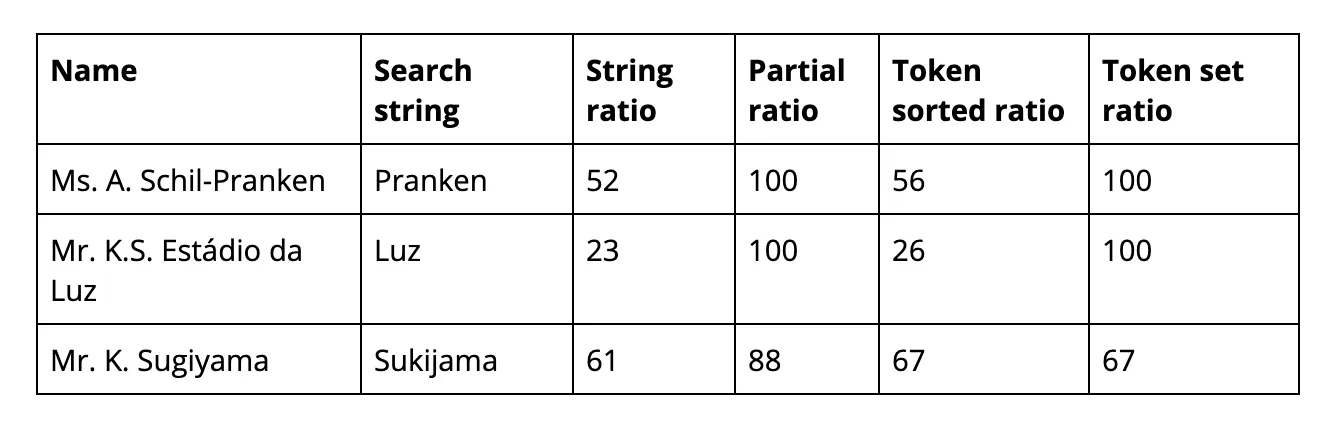

Focusing on only a part of the string with the partial ratio protocol seems to eliminate the parts of names that can be confusing, such as second names or other additional words. So the partial ratio seems to be the most helpful.

Install the fuzzy wuzzy package and try to incorporate a patient search function that utilizes the fuzzywuzze package. 

In [8]:
#install fuzzywuzzy
%pip install fuzzywuzzy

from fuzzywuzzy import fuzz


[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:


name = "Della Rosa"
# example solution
for index, row in df.iterrows():
    name_user_input = name
    name_in_database = str(row[1])
    partial_ratio = fuzz.partial_ratio(name_user_input.lower(), name_in_database.lower())
    if partial_ratio > 80:
        SSN = row[0]
        name = row[1]
        address = row[2]
        email = row[3]
        print("During search based the name,", name_user_input, " a match was found...")
        print("Partial string ratio =", partial_ratio)
        print("You can email this patient on:", email)


During search based on birthdate a name match was found...
Partial string ratio = 89
You can email this patient on: William@mail.com


## Next steps

Try to make a database that includes birthdate and gender
Try to search based on only the last name instead of the fullname
Try to search on address

Fill out the form below and we'll provide feedback on your code.

**Any feedback on the exercise? Any questions? Want feedback on your code? Please fill out the form [here](https://docs.google.com/forms/d/e/1FAIpQLSdoOjVom8YKf11LxJ_bWN40afFMsWcoJ-xOrKhMbfBzgxTS9A/viewform).**